# Earth science second assignment: 
## (Prediction of the 2020 daily tempreature of Durham)
-------

## 1. Imporing the libraries: 

#### - I will import general libraries here while I will import each dedicated one in its corresponding area:
#### - I add notes for each section to make this notebook inclusive as much as possible, but most of them are mentioned in the report. 

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

## 2. Reading, preprocessing, and plotting the data

In [65]:
#Reading the original file
originalFile = pd.read_csv("durhamtemp_1901_2019.csv").dropna()
originalFile.head()

,Year,Month,Day,Date,PPT.,Av temp,Tmax,Tmin
0,1901.0,1.0,1.0,01/01/1901,0.0,2.1,3.5,0.6
1,1901.0,1.0,2.0,02/01/1901,0.0,4.0,7.2,0.7
2,1901.0,1.0,3.0,03/01/1901,0.0,3.0,6.7,-0.7
3,1901.0,1.0,4.0,04/01/1901,0.0,3.7,7.9,-0.6
4,1901.0,1.0,5.0,05/01/1901,0.0,-0.3,1.2,-1.7


In [66]:
# Extracting the required data and dropping nan values
temp = originalFile[["Date", "Av temp"]].dropna()
temp ["Date"] = pd.to_datetime(temp["Date"], format="%d/%m/%Y")
temp.set_index("Date", inplace = True)
temp.head()

,Av temp
Date,
1901-01-01,2.1
1901-01-02,4.0
1901-01-03,3.0
1901-01-04,3.7
1901-01-05,-0.3


Text(0, 0.5, 'Tempreature [Degrees]')

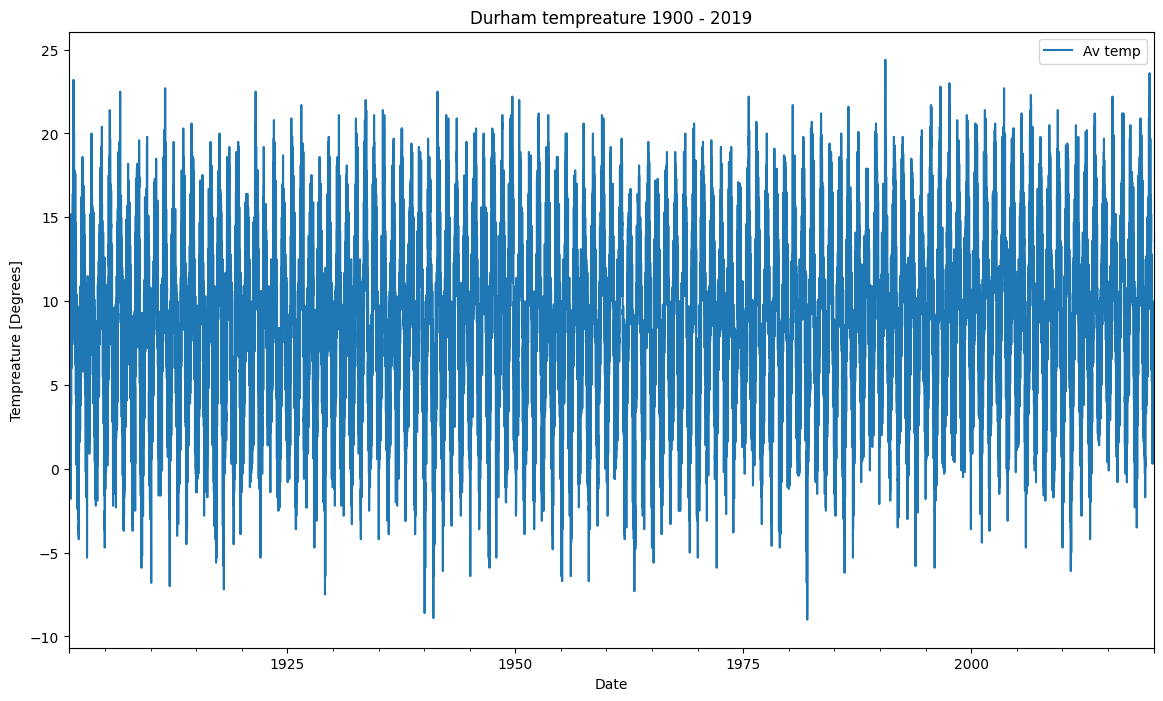

In [67]:
#Plotting the data
temp.plot(figsize = (14,8))
plt.title ("Durham tempreature 1900 - 2019")
plt.ylabel ("Tempreature [Degrees]")

## 3. Statastical-based approach: 
#### Working here is splitted on 5 steps as the following: 

### 1. Finding the decomposition of the time series:

In [98]:
#Import the library: 
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

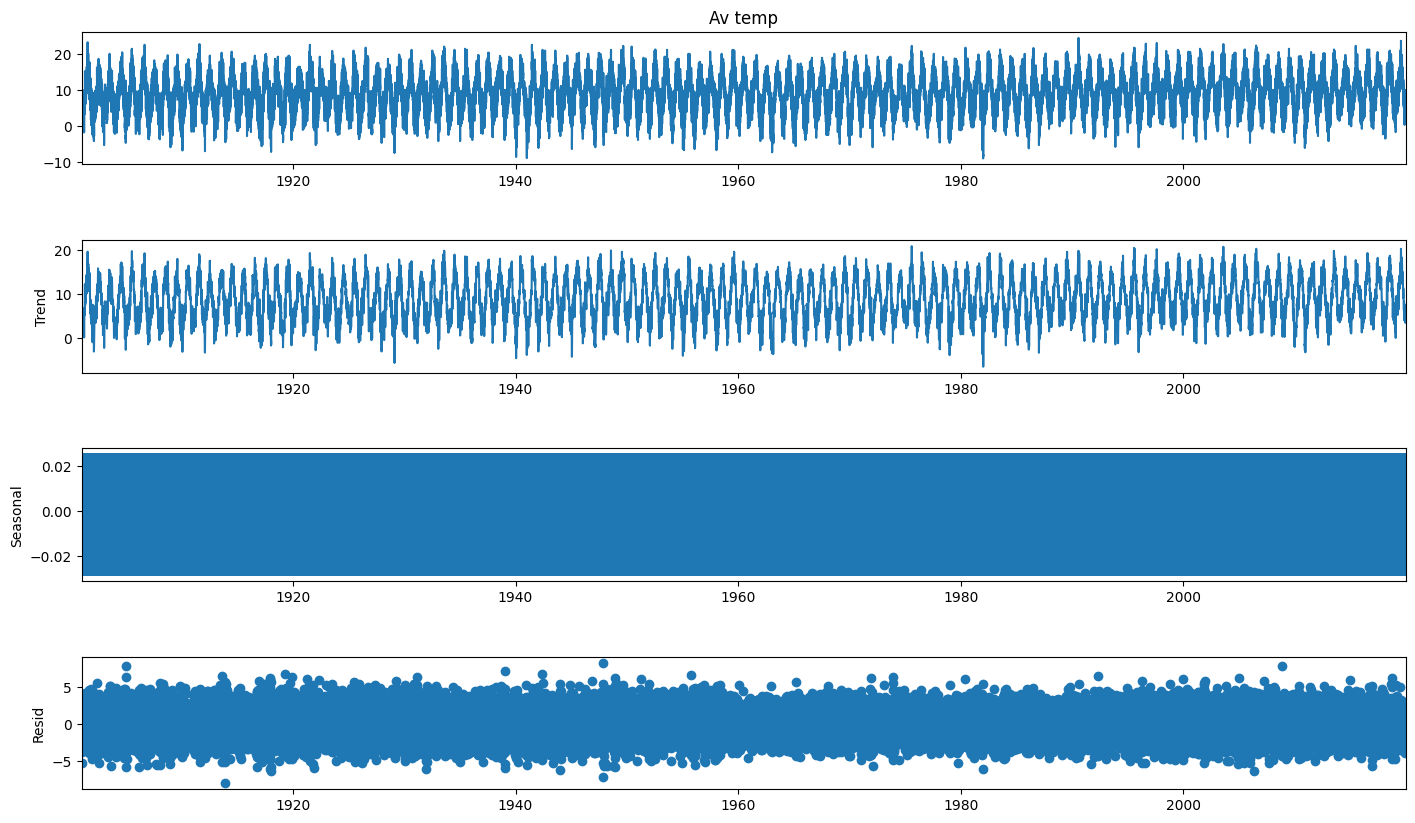

In [99]:
result = seasonal_decompose(temp["Av temp"], model='additive')
plt.figure()
fig = result.plot()
fig.set_size_inches((16, 9))
#plt.savefig("decomposition whole.png")
plt.show()

<Figure size 2000x1000 with 0 Axes>

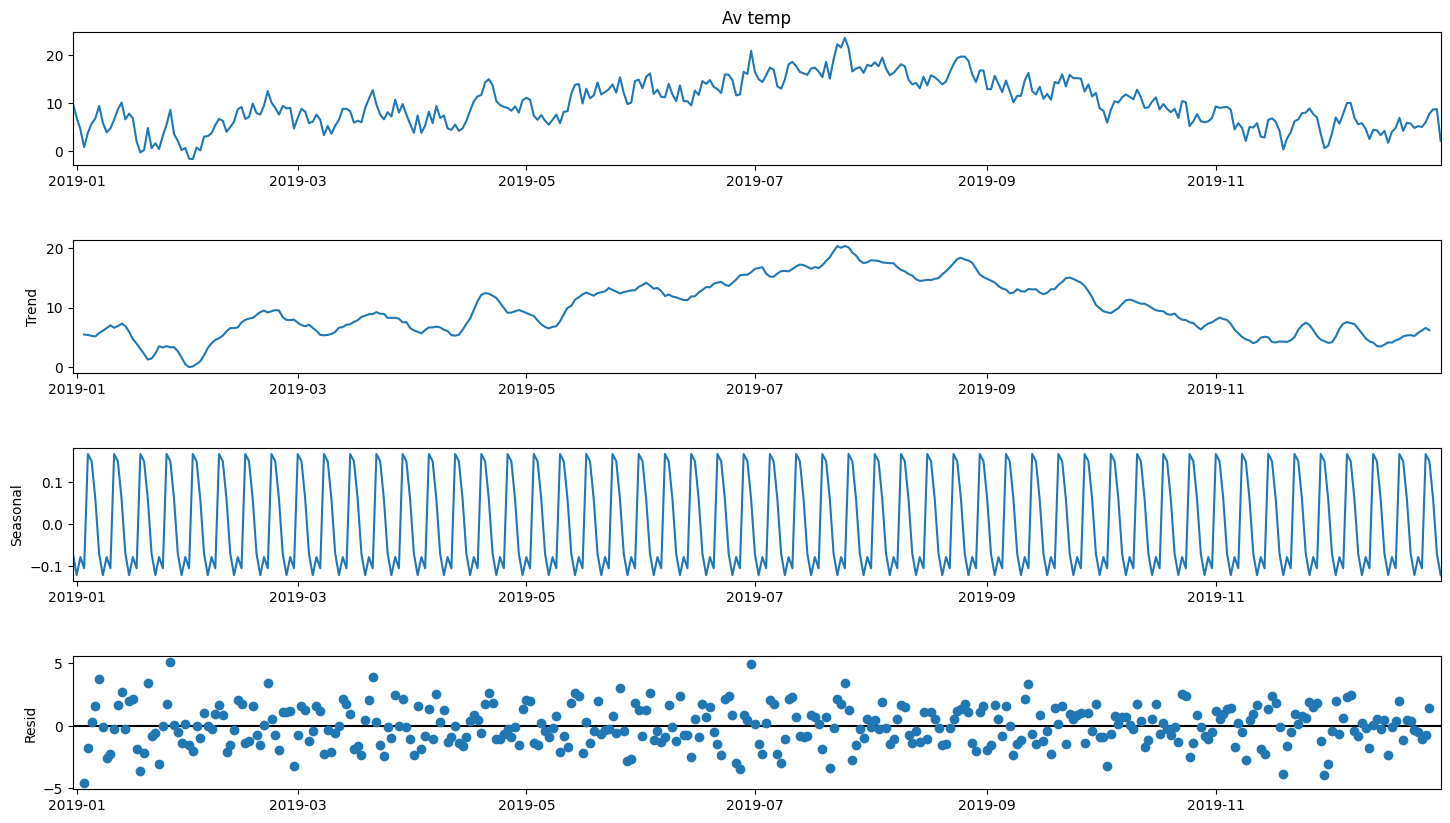

In [100]:
plt.figure(figsize = (20,10))
result = seasonal_decompose(temp["Av temp"].iloc[-366:], model='additive')
fig = result.plot()
fig.set_size_inches((16, 9))
plt.savefig ("decomposition one.png")
plt.show()

### 2. Check the stationerty using Augmented Dickey Fuller test

In [205]:
# Check the stationerty
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [206]:
check_stationarity(temp["Av temp"])

ADF Statistic: -17.643232
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


 ### 3. Finding Autocorrealtion (ACF) and partial autocorrelation (PACF):

In [11]:
#Import the required functions: 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [24]:
# define function to plot the autocorrelations
def plot_autoco(df, title = "original time series"):
    df = df.dropna()
    fig = plot_acf(df, lags=50)
    fig.set_size_inches((16, 9))
    plt.ylim(0,1)
    plt.xlabel('Lags', fontsize=18)
    plt.ylabel('Correlation', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f'Autocorrelation Plot for the {title}', fontsize=20)
    plt.tight_layout()
    #plt.savefig("acf rolled.png")
    plt.show()
    
   
    fig = plot_pacf(df, lags=40)
    fig.set_size_inches((16, 9))
    plt.ylim(0,1)
    plt.xlabel('Lags', fontsize=18)
    plt.ylabel('Correlation', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f'Partial Autocorrelation Plot for the {title}', fontsize=20)
    plt.tight_layout()
    #plt.savefig("pcf rolled.png")
    plt.show()
    


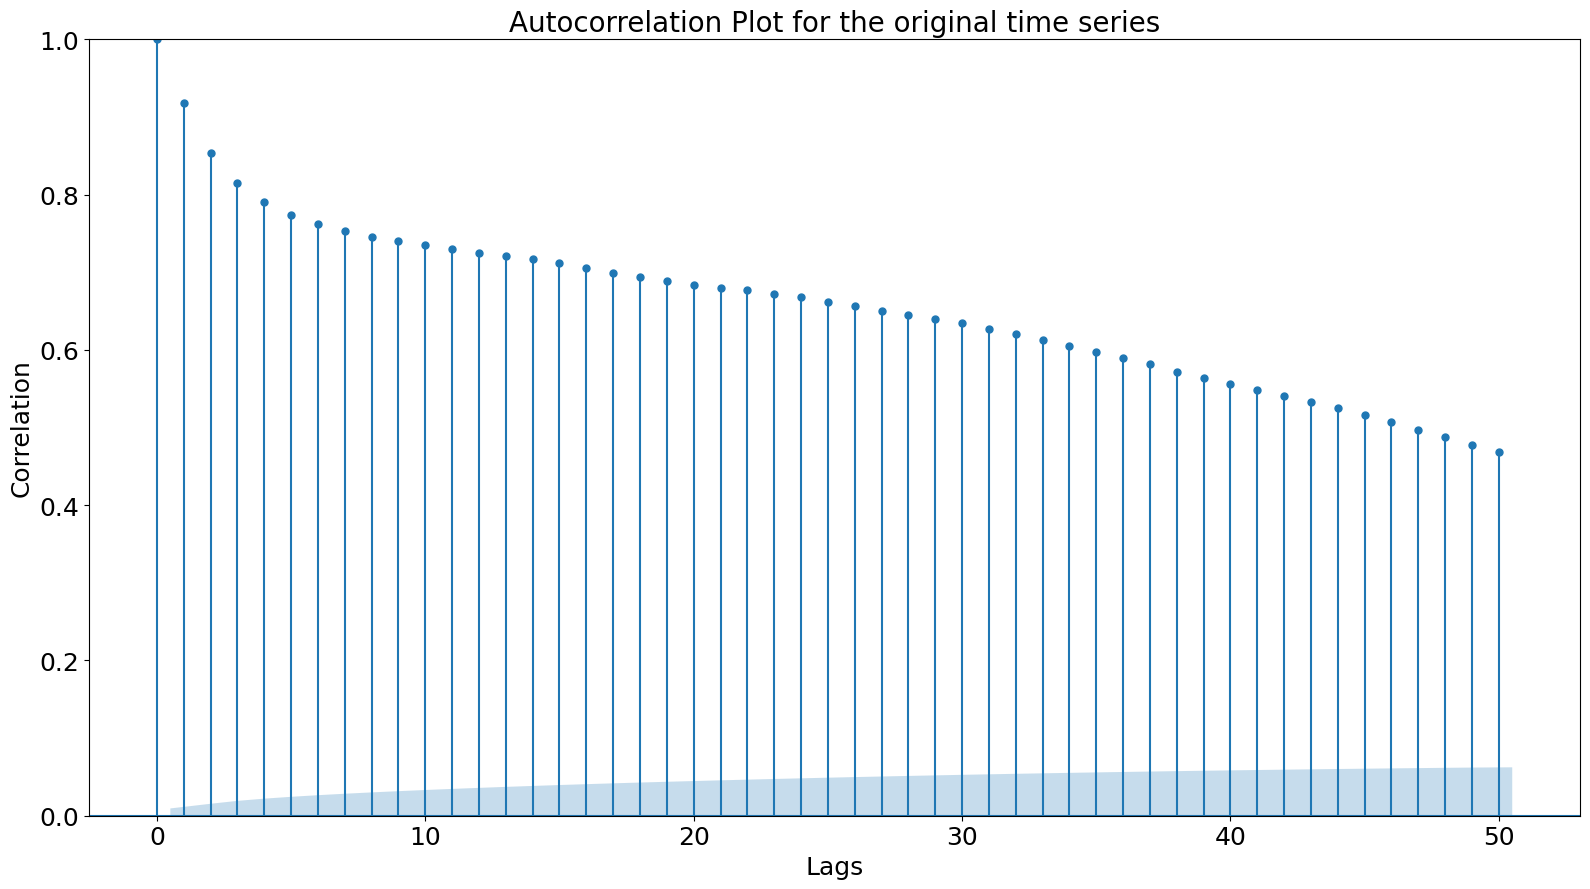

/Users/mohammeda.salha/opt/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


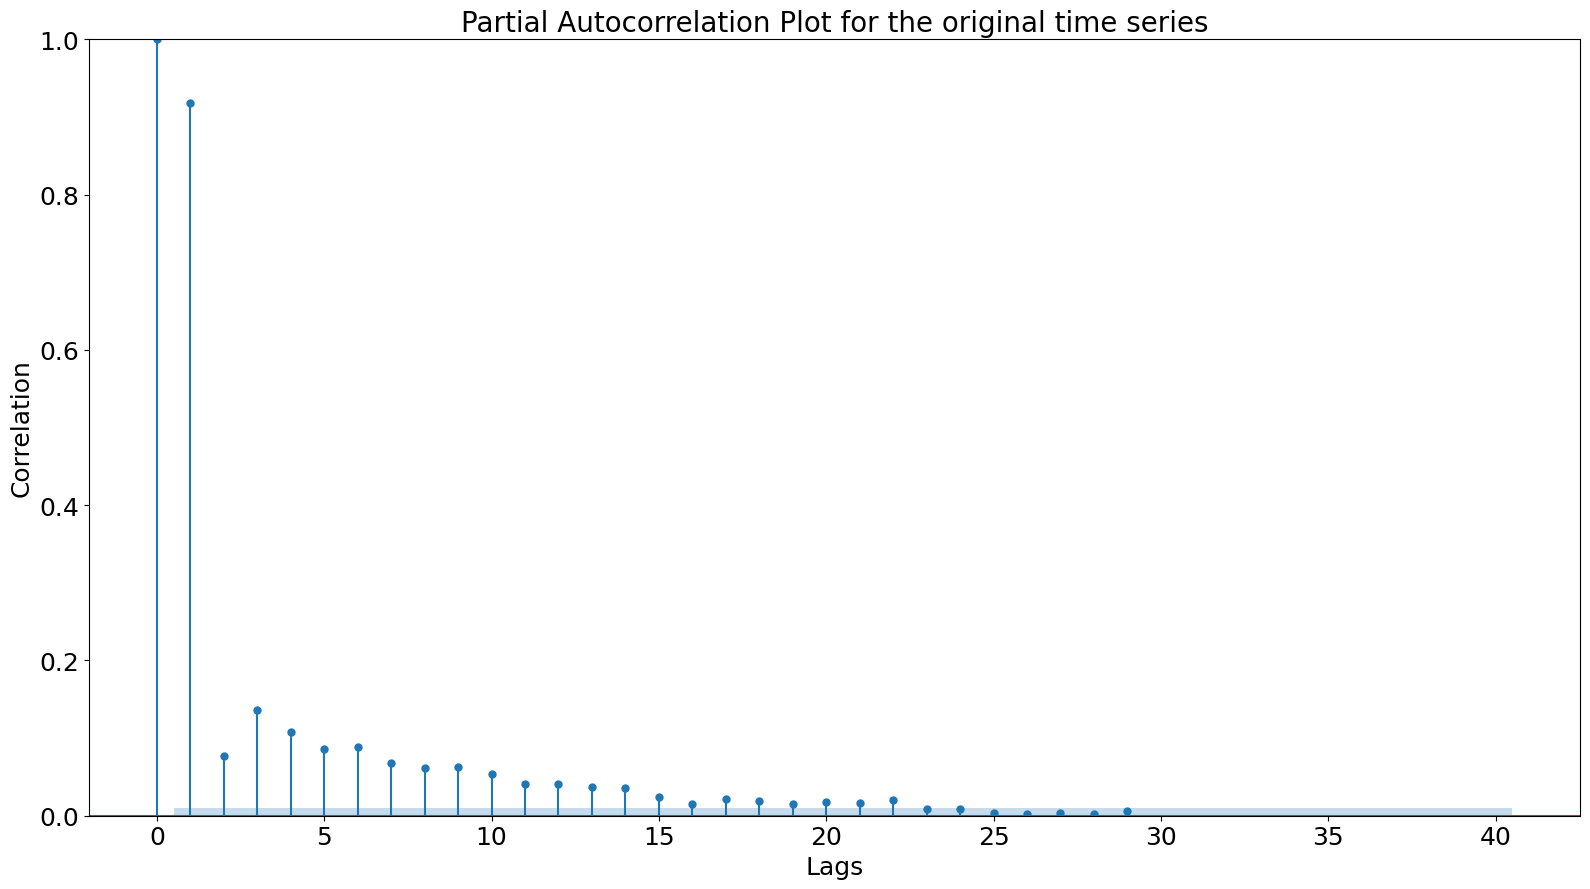

In [21]:
#Plot for the original time series
plot_autoco(temp["Av temp"])

**Try to find ACF and PACF after doing some manipulation on the data**

- Despite the fact of the stationerty, I tried to get more readable form for ACF and PACF but with new outcomes: 

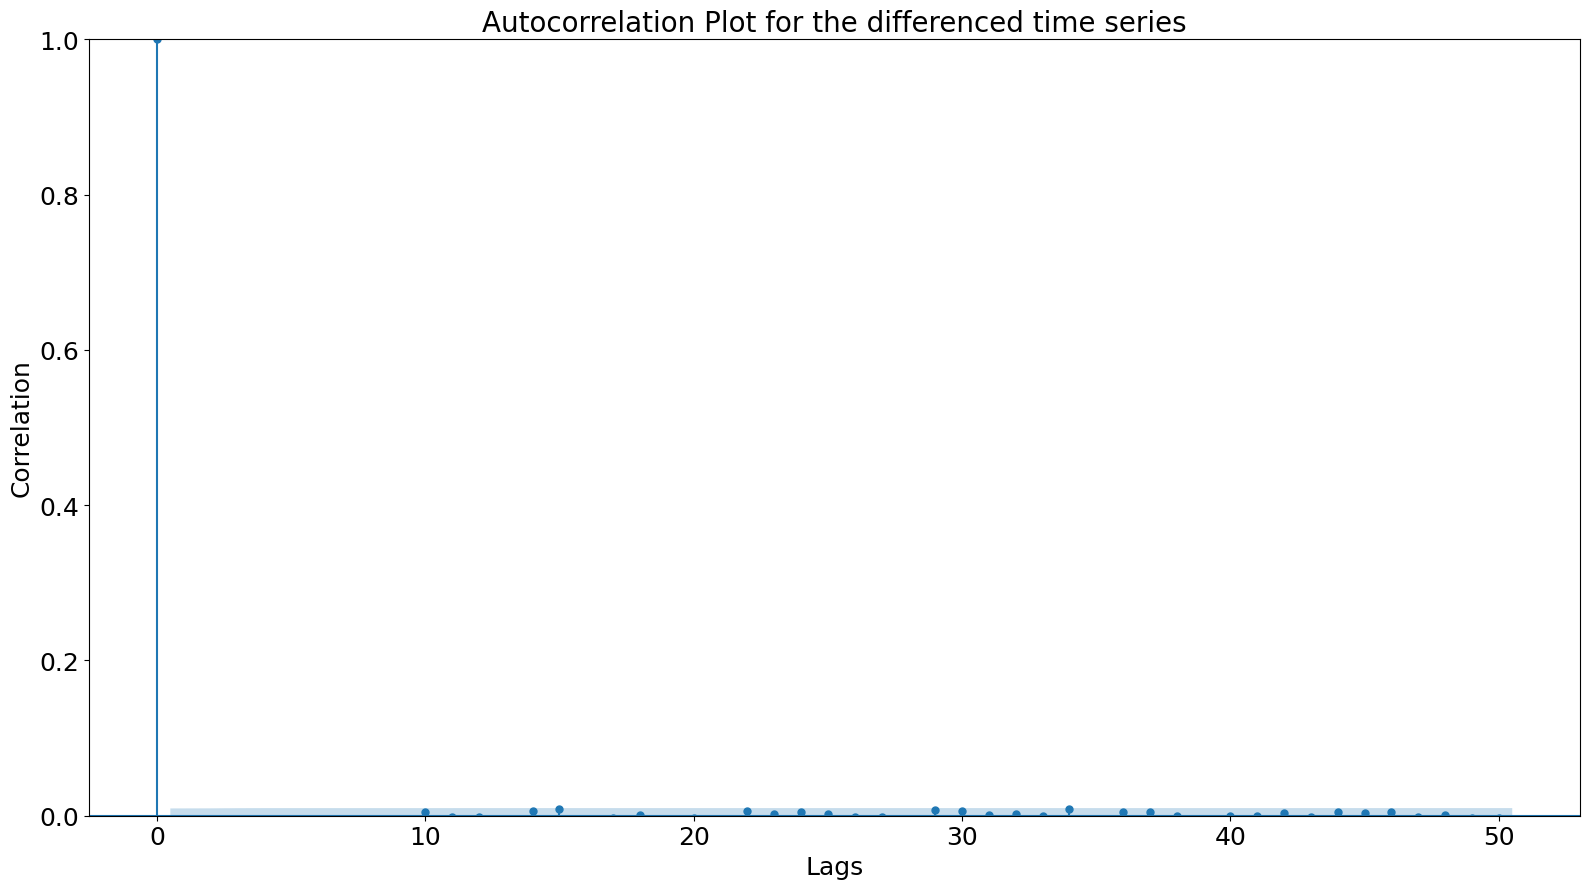

/Users/mohammeda.salha/opt/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


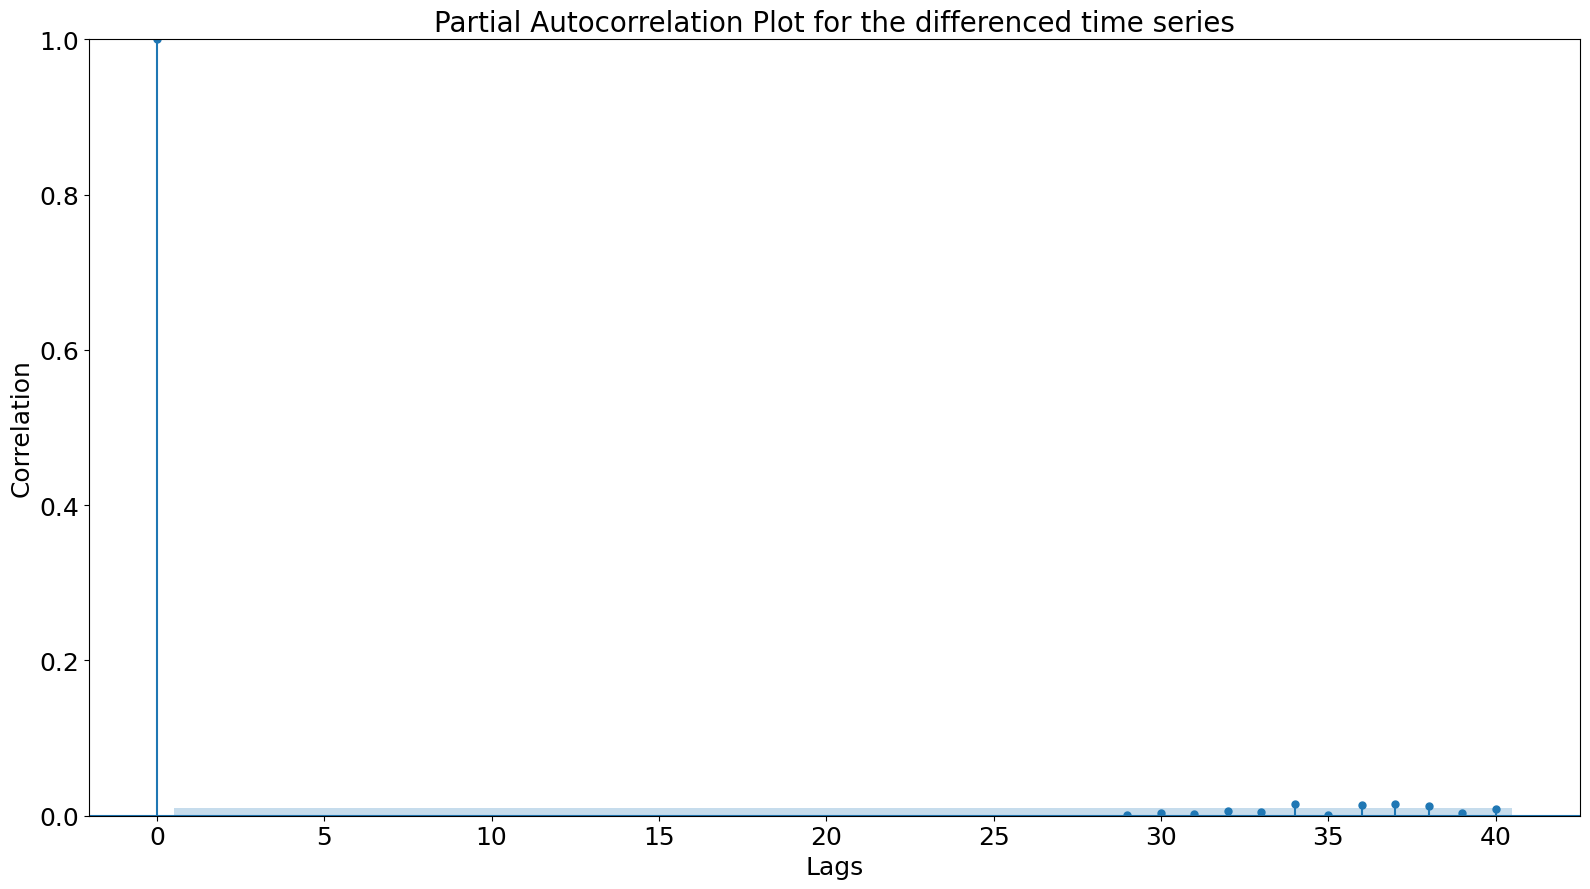

In [23]:
#Plot after doing differencing: 
tempdiff = temp.copy()
tempdiff = tempdiff.diff()
tempdiff["Av temp"][0] = temp["Av temp"][0]
plot_autoco(tempdiff, title = "differenced time series")

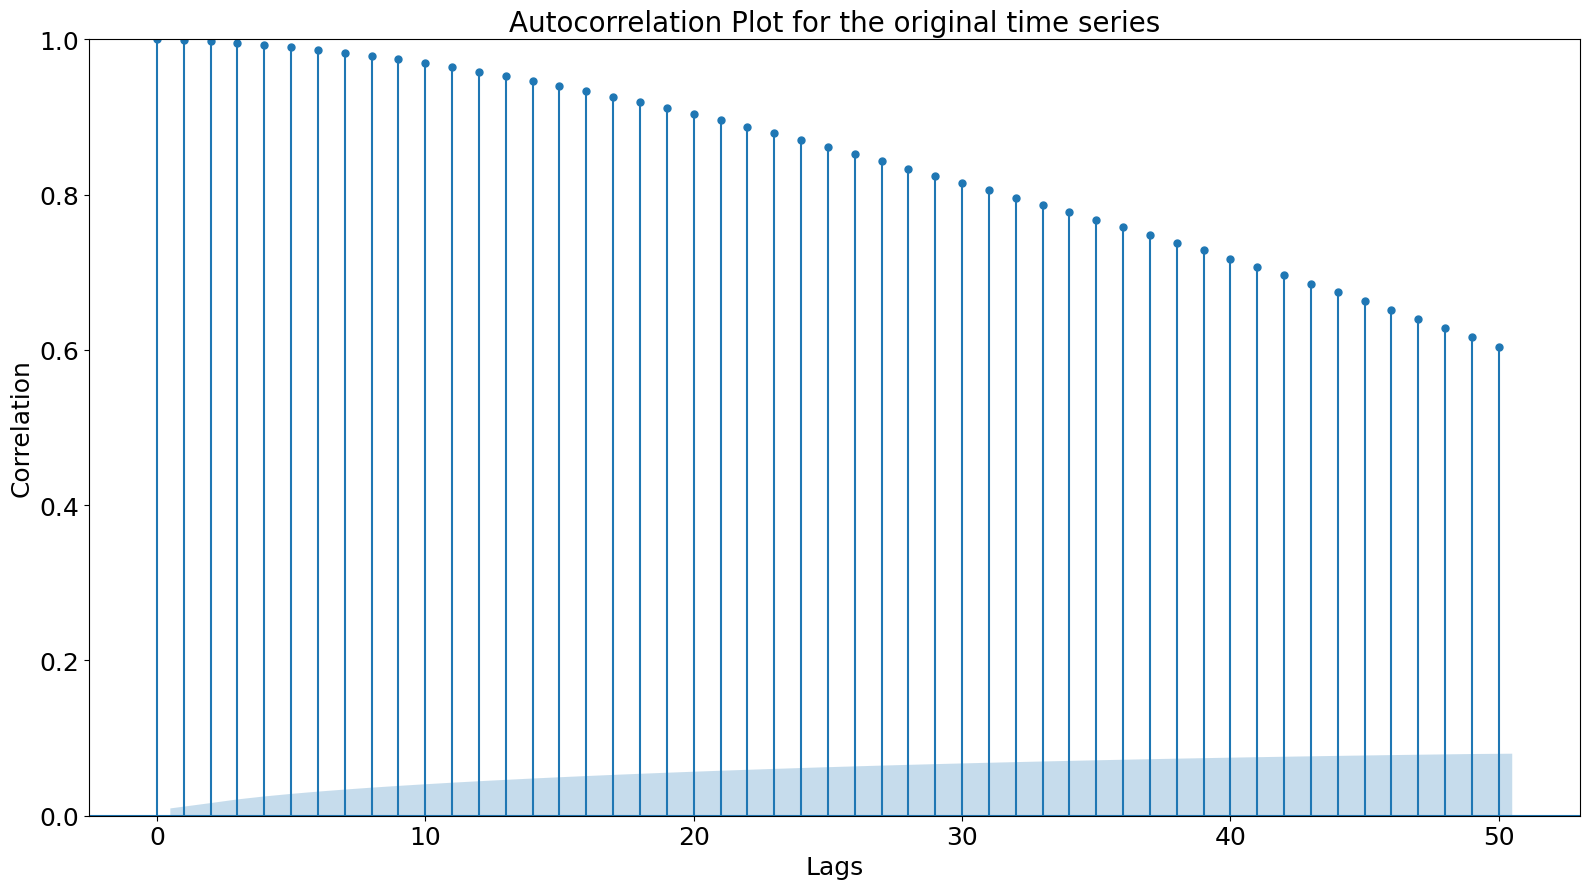

/Users/mohammeda.salha/opt/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


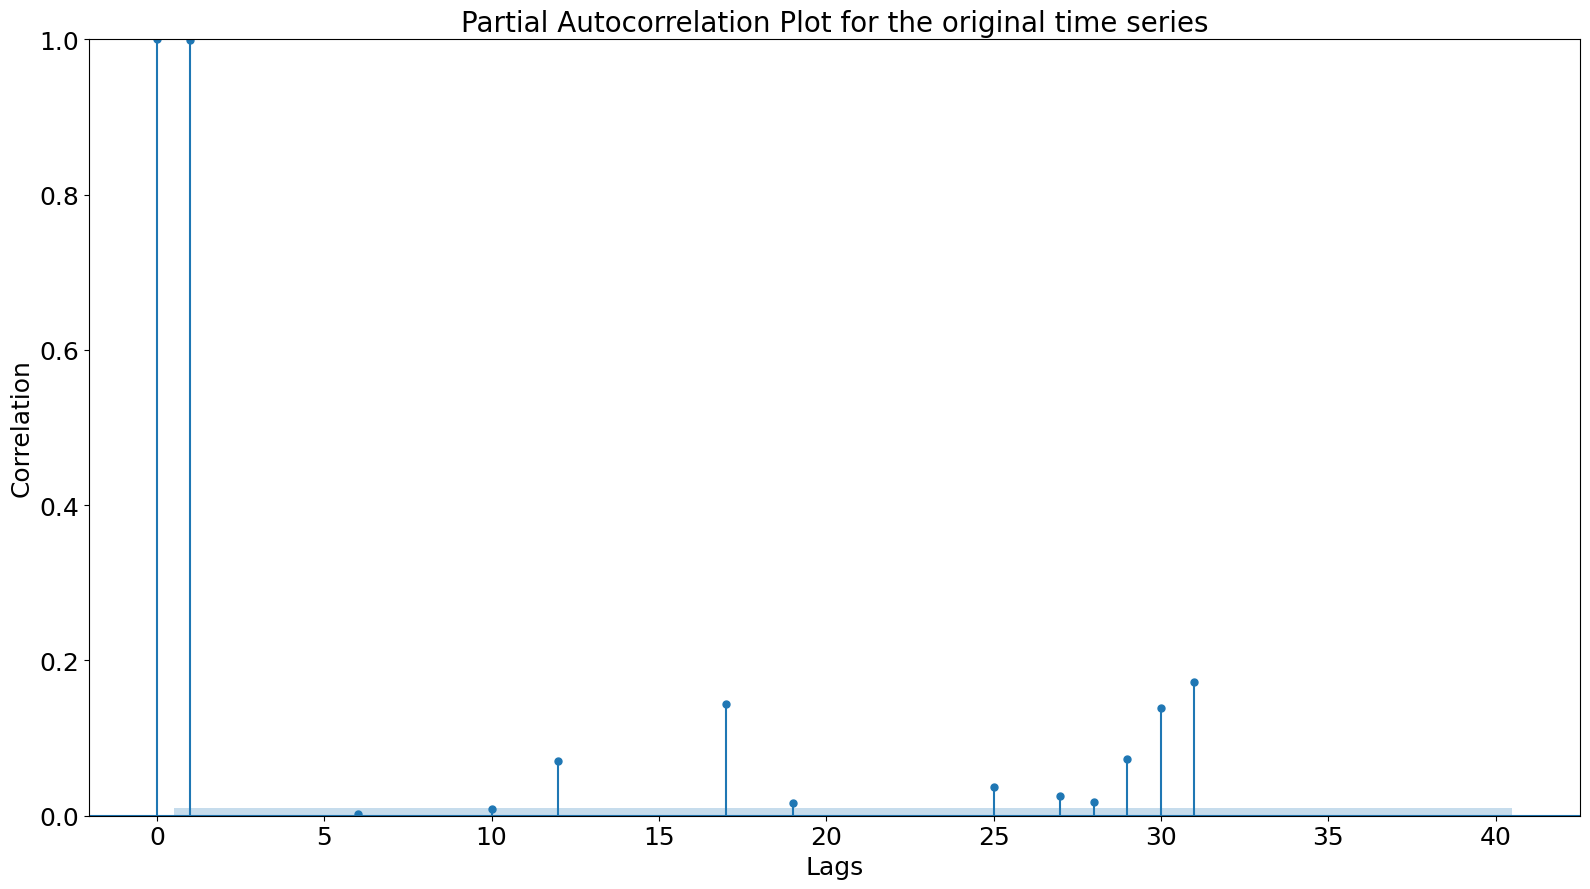

In [25]:
#Plot after doing smothing average
window_size = 30
temprolled = temp.copy()
temprolled = temprolled.rolling(window_size).mean()
temprolled[:31] = temp[:31]
plot_autoco(temprolled)

### 4. Applying ARIMA model: 

In [68]:
#Importing the required library:
from pmdarima.arima import auto_arima

In [69]:
#Extract the last 20 years from the time series so I can handel the process using my PC: 
temp20 = temp[int(len(temp)-20*365):]

In [38]:
# I set the parameters that can my pc handel: 
arima_model = auto_arima(temp10, start_p = 1, d=0, start_q = 0, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 1, D=0, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           
  
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.


Performing stepwise search to minimize aic
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=15527.864, Time=2.11 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=22081.012, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=18166.777, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=27633.568, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=15530.410, Time=0.23 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=15526.558, Time=7.13 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=15527.539, Time=29.52 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=10.56 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=36.56 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=18957.547, Time=5.45 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=15509.437, Time=10.49 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=15510.107, Time=2.71 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=15510.950, Time=48.71 sec
 ARIMA(2,0,0)(2,0,

In [70]:
#Splitting the data
size = int(0.66*len(temp20))
X_train, X_test = temp20[0:size], temp20[size:]
#Importing the required model that is resulted from the previous step
from statsmodels.tsa.statespace.sarimax import SARIMAX 
#Establish and fit the model:   
model = SARIMAX(X_train['Av temp'],  
                order = (3, 0, 1),  
                seasonal_order =(0, 0, 0, 12))   
result = model.fit()

/Users/mohammeda.salha/opt/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mohammeda.salha/opt/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15004D+00    |proj g|=  4.75081D-02

At iterate    5    f=  2.14528D+00    |proj g|=  2.28992D-02

At iterate   10    f=  2.14312D+00    |proj g|=  4.17137D-02

At iterate   15    f=  2.12026D+00    |proj g|=  3.16091D-02

At iterate   20    f=  2.10885D+00    |proj g|=  2.47553D-03

At iterate   25    f=  2.10829D+00    |proj g|=  2.02740D-03

At iterate   30    f=  2.10826D+00    |proj g|=  2.06142D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

Text(0, 0.5, 'Tempreature (Degrees)')

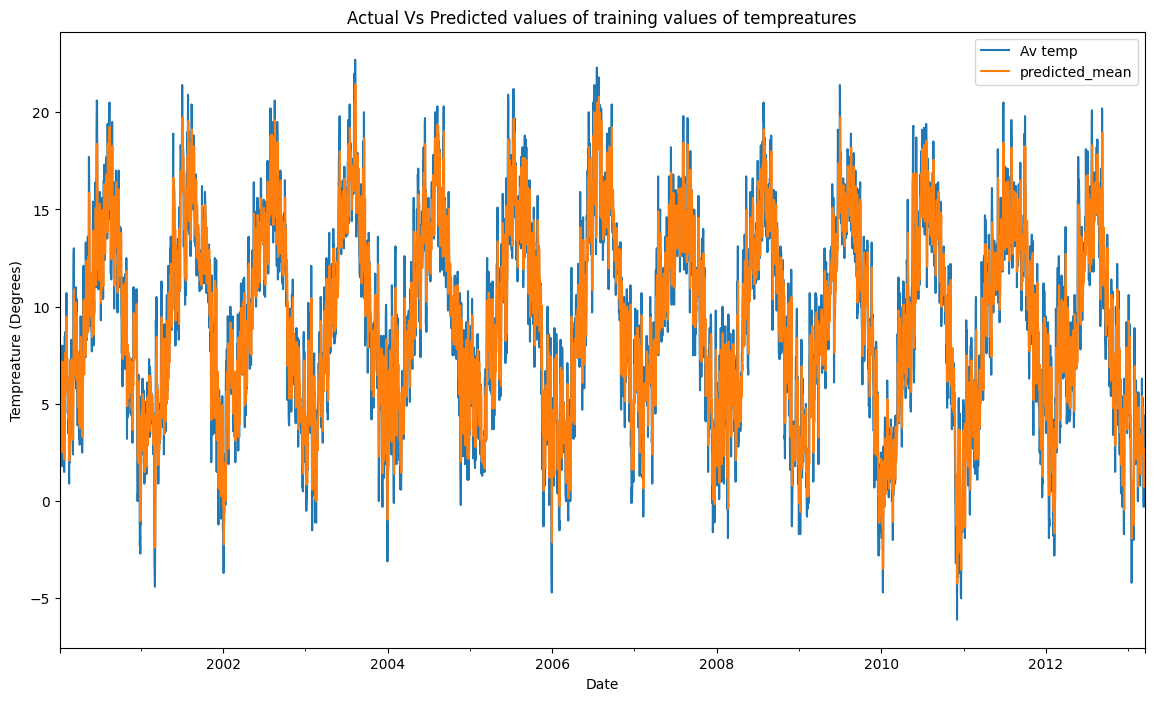

In [71]:
#Predicting the trained data and plotting it vs actual data
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 
# plot trained and actual values 
plt.figure(figsize = (14,8))
X_train['Av temp'].plot(legend = True)
train_prediction.plot(legend = True) 
plt.title("Actual Vs Predicted values of training values of tempreatures")
plt.ylabel ("Tempreature (Degrees)")
#plt.savefig("arima train.png")

In [72]:
start_index = len(X_train)
end_index = len(temp20)-1
prediction = result.predict(start_index, end_index).rename('Predicted av temp') 
prediction.head()


2013-03-16    3.992413
2013-03-17    3.527244
2013-03-18    3.251770
2013-03-19    3.106700
2013-03-20    3.031985
Freq: D, Name: Predicted av temp, dtype: float64

Text(0, 0.5, 'Tempreature (Degrees)')

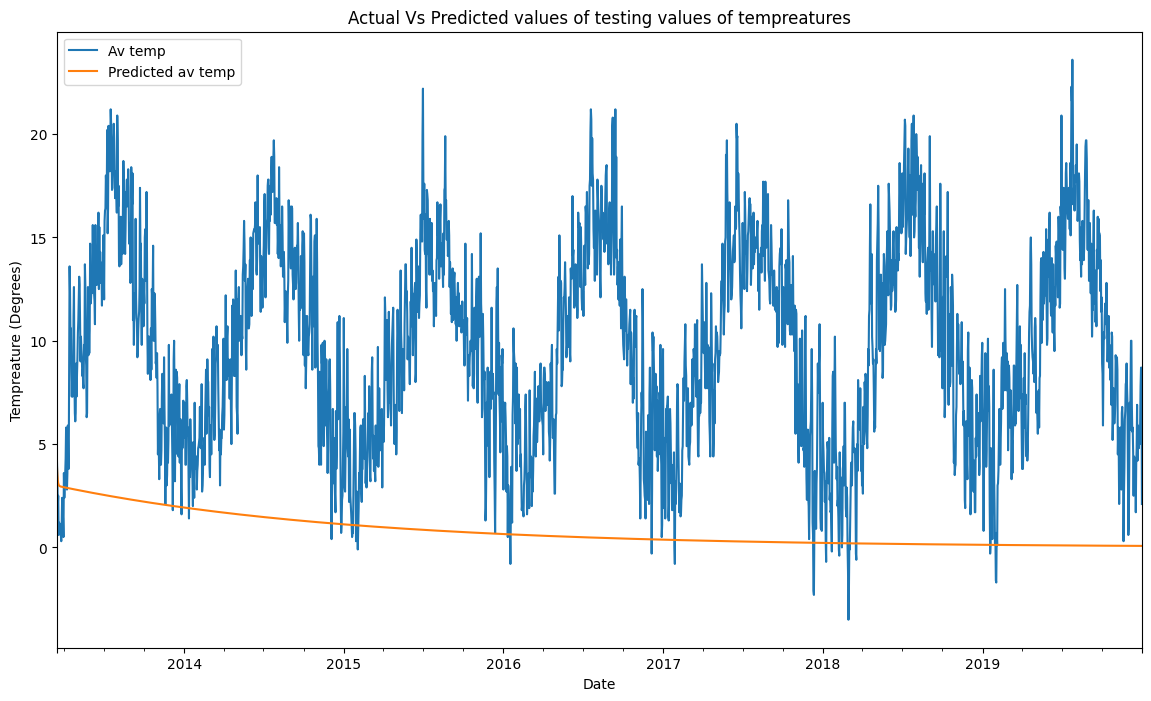

In [73]:
# plot test and actual values 
plt.figure(figsize = (14,8))
X_test['Av temp'].plot(legend = True)
prediction.plot(legend = True) 
plt.title("Actual Vs Predicted values of testing values of tempreatures")
plt.ylabel ("Tempreature (Degrees)")
#plt.savefig("arima test.png")

In [75]:
#Printing the score of training data
trainScorer_a1 = math.sqrt(mean_squared_error(train_prediction, X_train['Av temp']))
trainScorem_a1 = mean_absolute_error(train_prediction, X_train['Av temp'])
print('Train Score: %.2f RMSE' % (trainScorer_a1))
print('Train Score: %.2f MAE' % (trainScorem_a1))

#Printing the score of testing data
testScorer_a = math.sqrt(mean_squared_error(prediction, X_test['Av temp']))
testScorem_a = mean_absolute_error(prediction, X_test['Av temp'])
print('Test Score: %.2f RMSE' % (testScorer_a))
print('Test Score: %.2f MAE' % (testScorem_a))


Train Score: 1.99 RMSE
Train Score: 1.57 MAE
Test Score: 10.21 RMSE
Test Score: 9.02 MAE


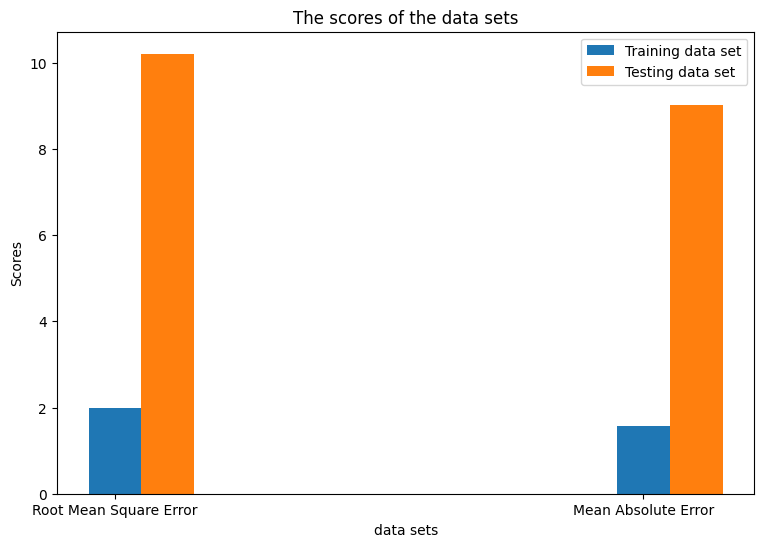

In [78]:
#Ploting the scores: 
x = np.array([0,0.5])
y1 = [trainScorer_a1,trainScorem_a1]
y2 = [testScorer_a,testScorem_a]

width = 0.05
  
# plot data in grouped manner of bar type
plt.figure (figsize = (9,6))
plt.bar(x, y1, width)
plt.bar(x+0.05, y2, width)
plt.xticks(x, ['Root Mean Square Error', 'Mean Absolute Error'])
plt.xlabel("data sets")
plt.ylabel("Scores")
plt.title("The scores of the data sets")
plt.legend(["Training data set", "Testing data set"])
plt.savefig("The scores of the data sets")
plt.show()

### 5. Conclusion:

    - As we can see in the above figures, the prediction of the training data is perfect while it is so bad in testing one which indicates that the model got overfitted. 
  

-------
## 4. Machine-learning-based approach:

#### I will use three different kinds of models in this section as the follwoing: 

### 1.  Univarient time series model: 

In [5]:
# Reading the data
temp20 = temp[len(temp)-356*20:] #I used the last 20 years of the data to ease the process of hyperparameters tuning
#Splitting the data: 
l = len(temp20)
train_df = temp20.iloc[:int(l*0.9)]
valid_df = temp20.iloc[int(l*0.7):int(l*0.9)]
test_df = temp20.iloc[int(l*0.9):]

In [6]:
#Normalizing the data: 
train_mean = train_df.mean()
train_std = train_df.std()
train_set = (train_df -train_mean )/train_std
valid_set = (valid_df-train_mean )/train_std
test_set = (test_df -train_mean )/train_std
train_meano = train_mean #I saved them to use in the coming model where these values won't be true
train_stdo = train_std #Because I will padd the coming time series with 366 values (2020 year)

#### I need to talk about this step in details: 
- It is known that, in a supervised learning method there should be an input and an output values.
- In the case of time series: we should reorganize the data in a way that satisfies this condition. 
- To do that, I need to split the data to number of slices depending on the size of a window. 
- For example, if I decided to slice the data in the length of 4 for each slice I will get an input shape of (1,4) and the output will be the value that follows the last value in this slice. 
- Taking a longer window will give a better result but the problem is with that: Long window may lead to an overfittied model, and it is time-consuming. 
- I pick the value of 32 as it gives good results.

In [7]:
n_input = 32
n_features = 1
def create_dataset (df, input_width = n_input, offset = 0, predict_column = "Av temp"):
    x = []
    y = []
    
    dataX = df.to_numpy()
    dataY = df[predict_column].to_numpy()
    
    for i in range (input_width, len(dataX) - offset):
        x.append(dataX[i - input_width:i, :])
        y.append(dataY[i + offset])
    
    x = np.array(x)
    y = np.array(y)
    
    return x, y.reshape(-1,1)


In [8]:
#Creating different datasets according to the last step (create_dataset function): 
trainSet = create_dataset(pd.DataFrame(train_set))
ValidSet = create_dataset(pd.DataFrame(valid_set))
testSet = create_dataset(pd.DataFrame(test_set))

In [9]:
# Import the required libraries to run the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

2023-05-01 21:21:52.629542: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
#define the model
np.random.seed(99) #to guarantee a reproducibility
model = Sequential()
model.add(LSTM(32, return_sequences=True,activation='relu', input_shape=trainSet[0].shape[1:]))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
#Fitting the model: 
np.random.seed(99) #to guarantee a reproducibility
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ['accuracy'])
model.fit (x = trainSet[0], y = trainSet[1],validation_data = (ValidSet[0],ValidSet[1]), epochs = 200)

Epoch 1/200
200/200 [==============================] - 4s 15ms/step - loss: 0.4837 - accuracy: 0.0000e+00 - val_loss: 0.3924 - val_accuracy: 0.0000e+00
Epoch 2/200
200/200 [==============================] - 2s 12ms/step - loss: 0.4381 - accuracy: 0.0000e+00 - val_loss: 0.3803 - val_accuracy: 0.0000e+00
Epoch 3/200
200/200 [==============================] - 2s 12ms/step - loss: 0.4287 - accuracy: 0.0000e+00 - val_loss: 0.3738 - val_accuracy: 0.0000e+00
Epoch 4/200
200/200 [==============================] - 3s 13ms/step - loss: 0.4260 - accuracy: 0.0000e+00 - val_loss: 0.3733 - val_accuracy: 0.0000e+00
Epoch 5/200
200/200 [==============================] - 2s 12ms/step - loss: 0.4225 - accuracy: 0.0000e+00 - val_loss: 0.3730 - val_accuracy: 0.0000e+00
Epoch 6/200
200/200 [==============================] - 2s 12ms/step - loss: 0.4294 - accuracy: 0.0000e+00 - val_loss: 0.3738 - val_accuracy: 0.0000e+00
Epoch 7/200
200/200 [==============================] - 2s 12ms/step - loss: 0.4214 - acc

200/200 [==============================] - 2s 12ms/step - loss: 0.2808 - accuracy: 0.0000e+00 - val_loss: 0.2492 - val_accuracy: 0.0000e+00
Epoch 140/200
200/200 [==============================] - 2s 12ms/step - loss: 0.2794 - accuracy: 0.0000e+00 - val_loss: 0.2410 - val_accuracy: 0.0000e+00
Epoch 141/200
200/200 [==============================] - 2s 12ms/step - loss: 0.2785 - accuracy: 0.0000e+00 - val_loss: 0.2485 - val_accuracy: 0.0000e+00
Epoch 142/200
200/200 [==============================] - 3s 13ms/step - loss: 0.2786 - accuracy: 0.0000e+00 - val_loss: 0.2436 - val_accuracy: 0.0000e+00
Epoch 143/200
200/200 [==============================] - 2s 12ms/step - loss: 0.2757 - accuracy: 0.0000e+00 - val_loss: 0.2451 - val_accuracy: 0.0000e+00
Epoch 144/200
200/200 [==============================] - 2s 12ms/step - loss: 0.2752 - accuracy: 0.0000e+00 - val_loss: 0.2444 - val_accuracy: 0.0000e+00
Epoch 145/200
200/200 [==============================] - 2s 12ms/step - loss: 0.2756 - acc

#### In the following cell I need to discusse the way of prediction: 
- First I start with the last slice of validation dataset as an input to predict the first value in the testing set. 
- Then I append this slice with the last predicted value from the model and I omit the first value.
- In this way, I continue making new slices depending on the predicted values. 

In [18]:
#Doing prediction for the testing dataset:
test_predictions = []
n_input = 32
n_features = 1

first_eval_batch = trainSet[0][-1]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

print(current_batch.shape)
for i in range(len(testSet[0])):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0,-1,0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    new = current_batch[:,1:,:]
    new = np.insert(new,(n_input-1),current_pred)
    current_batch = new.reshape(1,n_input,n_features)


(1, 32, 1)
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


In [19]:
#Returning data to the form before the normalization to get the actual values. 
def inverse(data):
    arr = np.array(data)
    result = arr*np.array(train_std)[0] + np.array(train_mean)[0]
    return result

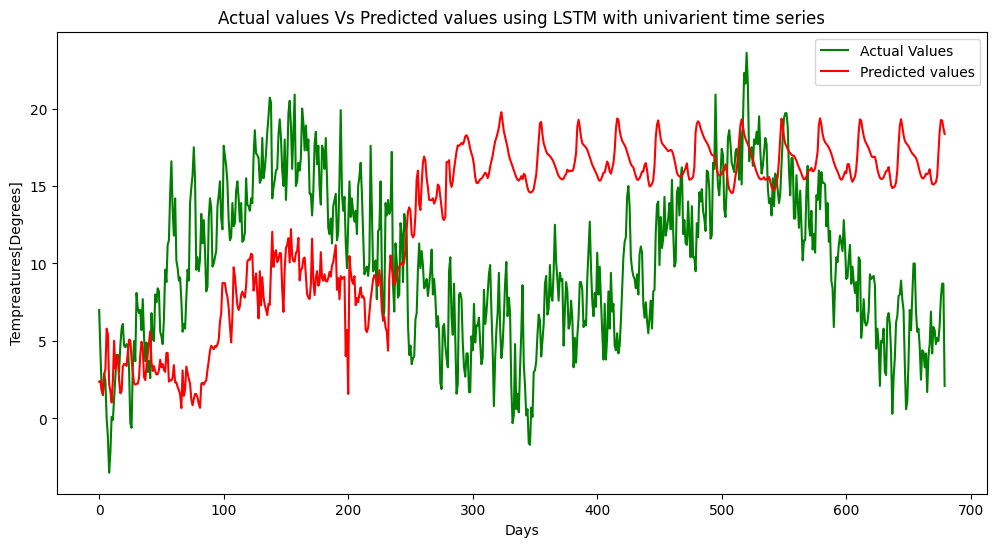

In [20]:
a = np.array(testSet[1])
test_inverse = inverse(a)
predicted_inverse = inverse(test_predictions)

plt.figure(figsize = (12,6))
plt.plot(test_inverse, c ='g', label = "Actual Values")
plt.plot(predicted_inverse, c ="r", label = "Predicted values")
plt.title("Actual values Vs Predicted values using LSTM with univarient time series")
plt.xlabel("Days")
plt.ylabel("Tempreatures[Degrees]")
plt.legend()
plt.savefig("univarient image training for the data of last 20 years.png")
plt.show()

In [21]:
trainScorer_u = math.sqrt(mean_squared_error(test_inverse, predicted_inverse))
trainScorem_u = mean_absolute_error(test_inverse, predicted_inverse)
print('Train Score: %.2f RMSE' % (trainScorer_u))
print('Train Score: %.2f MAE' % (trainScorem_u))

Train Score: 7.93 RMSE
Train Score: 6.82 MAE


------
### 2. Multivariate time series model: 

In [4]:
# Get a copy from the original dataframe: 
temp_multi = originalFile.loc[:,["Date","Av temp"]]
temp_multi = temp_multi.dropna() #Dropping the empty rows
temp_multi ["Date"] = pd.to_datetime(temp_multi ["Date"], format="%d/%m/%Y")
temp_multi.head()

,Date,Av temp
0,1901-01-01,2.1
1,1901-01-02,4.0
2,1901-01-03,3.0
3,1901-01-04,3.7
4,1901-01-05,-0.3


#### In the following cell I need to prepare the data to be multivariate depending on the dates:
- In order to do that I will convert the whole dates to seconds.
- Then I will attache these seconds to days and years using sinusoidal functions.
- Depending on that, I need to prepare the data for the target year: 2020. 
- So, I will append the dates then doing the other operations as I will show later. 

In [5]:
#Appending the original time series with dates of the year of 2020 
dates = pd.date_range(start='2020-01-01', end='2020-12-31')
df = pd.DataFrame({"Date": dates})
temp_multi = temp_multi.append(df)
temp_multi.set_index("Date", inplace = True)
temp_multi.tail()

/var/folders/5h/yplt5td549x2mqvcd96blk9m0000gn/T/ipykernel_56453/2331596252.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_multi = temp_multi.append(df)


,Av temp
Date,
2020-12-27,NaN
2020-12-28,NaN
2020-12-29,NaN
2020-12-30,NaN
2020-12-31,NaN


In [51]:
#Converting these dates to seconds: 
timestamps_s = temp_multi.index
timestamps_s = timestamps_s.map(pd.Timestamp.timestamp)

In [52]:
#Creating periodic function depending on these timestamps
day = 24*60*60
year = 365.2425*day
temp_multi["Day sin"] = np.sin(timestamps_s*(2*np.pi/day))
temp_multi["Day cos"] = np.cos(timestamps_s*(2*np.pi/day)) #it takes always the same value (degenerate case)
temp_multi["Year sin"] = np.sin(timestamps_s*(2*np.pi/year))
temp_multi["Year cos"] = np.cos(timestamps_s*(2*np.pi/year))
temp_multi.head()

,Av temp,Day sin,Year sin,Year cos,Day cos
Date,,,,,
1901-01-01,2.1,2.179044e-11,-0.004602,0.999989,1.0
1901-01-02,4.0,1.153706e-11,0.012601,0.999921,1.0
1901-01-03,3.0,1.283686e-12,0.029799,0.999556,1.0
1901-01-04,3.7,2.013414e-11,0.046989,0.998895,1.0
1901-01-05,-0.3,9.880763e-12,0.064165,0.997939,1.0


In [53]:
#Check the correlation with the tempreature data: 
temp_multi.corr()

,Av temp,Day sin,Year sin,Year cos,Day cos
Av temp,1.000000,-0.061654,-3.320236e-01,-7.689847e-01,NaN
Day sin,-0.061654,1.000000,4.530729e-03,1.654174e-05,NaN
Year sin,-0.332024,0.004531,1.000000e+00,-2.243003e-07,NaN
Year cos,-0.768985,0.000017,-2.243003e-07,1.000000e+00,NaN
Day cos,NaN,NaN,NaN,NaN,NaN


In [56]:
#As we can see the tempreature is mostly negatively correlated with a Year cos signal
#While it is not correlated at all with a Day cos one, so I will drop it:
temp_multi.drop("Day cos", axis = 1, inplace = True)

Text(0.5, 1.0, 'Time of day signal')

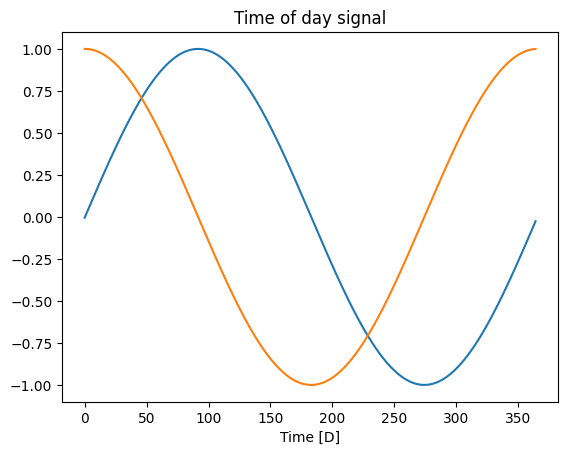

In [57]:
#Plotting year sin and cos 
plt.plot(np.array(temp_multi['Year sin'])[:365])
plt.plot(np.array(temp_multi['Year cos'])[:365])
plt.xlabel('Time [D]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of day signal')

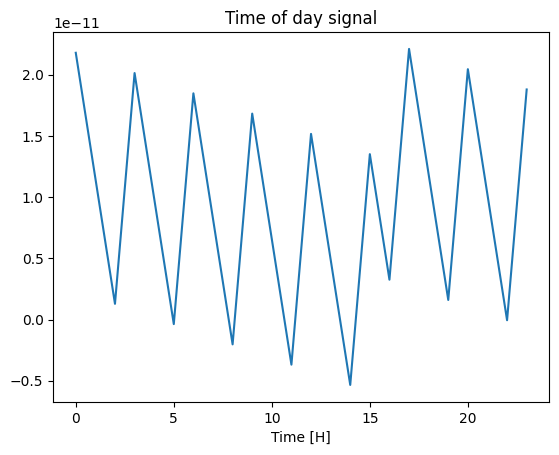

In [59]:
#Plotting Day sin 
#It is supposed to get a one cycle sine wave, but I got this weierd result
#I couldn't find a good reason for this and I left it because it has a correlation with Av temp
plt.plot(np.array(temp_multi['Day sin'])[:24])
plt.xlabel('Time [H]')
plt.title('Time of day signal')

In [28]:
#Extracting the last 20 years to make the process of grid search in hyperparameters faster
#temp_multi = temp_multi[len(temp_multi)-20*365:]

In [29]:
#Splitting the data: 
n = len (temp_multi)
train_set = temp_multi[:int(n*0.7)]
val_set = temp_multi [int(n*0.7):int(n*0.9)]
test_set = temp_multi [int(n*0.9):-366] # I left them to be predicted after that 

In [30]:
#Normalizing the data
train_mean = train_set.mean()
train_std = train_set.std()
train_mean[0] = temp.mean() #I do this only for tempreature to avoid wrong values resulted from appended dates
train_std[0] = temp.std() #Here is also the same

train_set = (train_set -train_mean )/train_std
val_set = (val_set -train_mean )/train_std
test_set = (test_set -train_mean )/train_std


In [31]:
#Creating data set using creat_dataset function but with different number of features:
n_input = 32
n_features = 4
trainSet = create_dataset(train_set)
valSet = create_dataset(val_set)
testSet = create_dataset(test_set)

#### Defining a model by using a Gridsearch cv to get the best hyperparameters: 
- Instead of adding random hyperparameters just like number on neurons, kind of optimizer, and number of epoches.
- I can use Gridsearch cv to search about the best ones.
- I used it only in this step because it's very time consuming so I need to use it with a model that I need to stick to.
- From my previous few trials I found this one is the best model so I will apply it here. 

In [32]:
#Importing the required libraries
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.constraints import MaxNorm

In [35]:
np.random.seed(99) #to guarantee a reproducibility
model = Sequential()
model.add(LSTM(32, return_sequences=True,activation='relu', input_shape=trainSet[0].shape[1:],kernel_constraint=MaxNorm(4)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(23, return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [36]:
#Fitting the model: 
np.random.seed(99) #to guarantee a reproducibility
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ['accuracy'])
model.fit (x = trainSet[0], y = trainSet[1],validation_data = (valSet[0],valSet[1]), epochs = 200)

Epoch 1/200
958/958 [==============================] - 25s 24ms/step - loss: 0.3245 - accuracy: 0.0000e+00 - val_loss: 0.3187 - val_accuracy: 0.0000e+00
Epoch 2/200
958/958 [==============================] - 23s 24ms/step - loss: 0.2877 - accuracy: 0.0000e+00 - val_loss: 0.2860 - val_accuracy: 0.0000e+00
Epoch 3/200
958/958 [==============================] - 23s 24ms/step - loss: 0.2845 - accuracy: 0.0000e+00 - val_loss: 0.2952 - val_accuracy: 0.0000e+00
Epoch 4/200
958/958 [==============================] - 23s 24ms/step - loss: 0.2830 - accuracy: 0.0000e+00 - val_loss: 0.2953 - val_accuracy: 0.0000e+00
Epoch 5/200
958/958 [==============================] - 23s 24ms/step - loss: 0.2805 - accuracy: 0.0000e+00 - val_loss: 0.2867 - val_accuracy: 0.0000e+00
Epoch 6/200
958/958 [==============================] - 23s 24ms/step - loss: 0.2791 - accuracy: 0.0000e+00 - val_loss: 0.2931 - val_accuracy: 0.0000e+00
Epoch 7/200
958/958 [==============================] - 23s 24ms/step - loss: 0.277

958/958 [==============================] - 23s 24ms/step - loss: 0.1158 - accuracy: 0.0000e+00 - val_loss: 0.4573 - val_accuracy: 0.0000e+00
Epoch 108/200
958/958 [==============================] - 22s 23ms/step - loss: 0.1150 - accuracy: 0.0000e+00 - val_loss: 0.4575 - val_accuracy: 0.0000e+00
Epoch 109/200
958/958 [==============================] - 23s 24ms/step - loss: 0.1150 - accuracy: 0.0000e+00 - val_loss: 0.4596 - val_accuracy: 0.0000e+00
Epoch 110/200
958/958 [==============================] - 22s 23ms/step - loss: 0.1147 - accuracy: 0.0000e+00 - val_loss: 0.4846 - val_accuracy: 0.0000e+00
Epoch 111/200
958/958 [==============================] - 23s 24ms/step - loss: 0.1127 - accuracy: 0.0000e+00 - val_loss: 0.4689 - val_accuracy: 0.0000e+00
Epoch 112/200
958/958 [==============================] - 22s 23ms/step - loss: 0.1130 - accuracy: 0.0000e+00 - val_loss: 0.4574 - val_accuracy: 0.0000e+00
Epoch 113/200
958/958 [==============================] - 23s 24ms/step - loss: 0.111

Epoch 160/200
958/958 [==============================] - 23s 24ms/step - loss: 0.0866 - accuracy: 0.0000e+00 - val_loss: 0.4940 - val_accuracy: 0.0000e+00
Epoch 161/200
958/958 [==============================] - 23s 24ms/step - loss: 0.0848 - accuracy: 0.0000e+00 - val_loss: 0.4846 - val_accuracy: 0.0000e+00
Epoch 162/200
958/958 [==============================] - 23s 24ms/step - loss: 0.0852 - accuracy: 0.0000e+00 - val_loss: 0.4822 - val_accuracy: 0.0000e+00
Epoch 163/200
958/958 [==============================] - 23s 23ms/step - loss: 0.0850 - accuracy: 0.0000e+00 - val_loss: 0.4832 - val_accuracy: 0.0000e+00
Epoch 164/200
958/958 [==============================] - 23s 24ms/step - loss: 0.0875 - accuracy: 0.0000e+00 - val_loss: 0.4892 - val_accuracy: 0.0000e+00
Epoch 165/200
958/958 [==============================] - 23s 24ms/step - loss: 0.0832 - accuracy: 0.0000e+00 - val_loss: 0.4937 - val_accuracy: 0.0000e+00
Epoch 166/200
958/958 [==============================] - 22s 23ms/step

In [37]:
#Predicting the training data: 
test_predictions = []
first_eval_batch = valSet[0][-1]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
predicted_set = temp_multi [int(n*0.9)-n_input:-366]

for i in range(len(testSet[0])):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0,-1,0]
    
    predicted_set["Av temp"].iloc[n_input+i-1] = current_pred
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.array(predicted_set[0+i+1:n_input+i+1]).reshape(1,n_input,n_features)


1/1 [==============================] - 0s 13ms/step


/var/folders/5h/yplt5td549x2mqvcd96blk9m0000gn/T/ipykernel_27530/3929239660.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_set["Av temp"].iloc[n_input+i-1] = current_pred


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 12ms/step


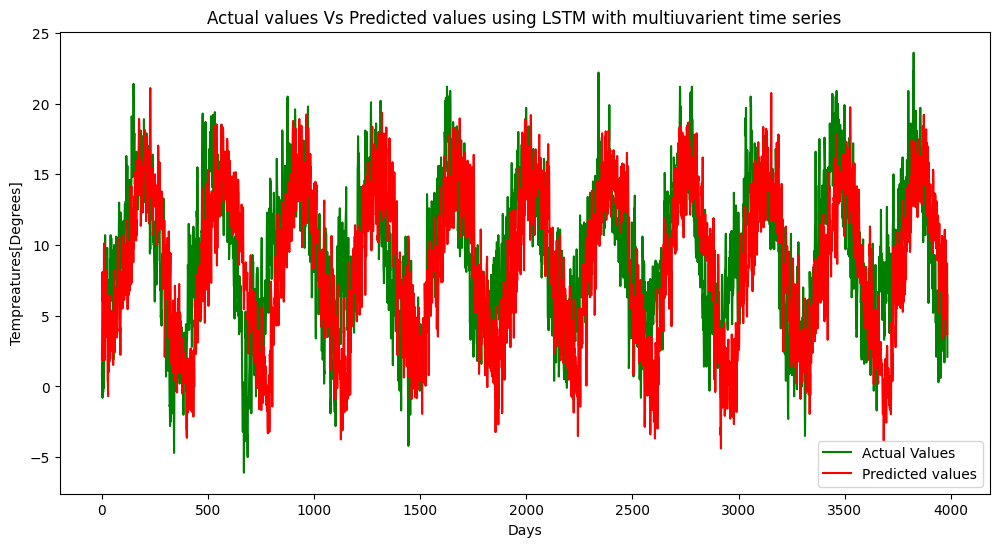

In [56]:
a = np.array(testSet[1])
test_inverse = inverse(a)
predicted_inverse = inverse(test_predictions)

plt.figure(figsize = (12,6))
plt.plot(test_inverse, c ='g', label = "Actual Values")
plt.plot(predicted_inverse, c ="r", label = "Predicted values")
plt.title("Actual values Vs Predicted values using LSTM with multiuvarient time series")
plt.xlabel("Days")
plt.ylabel("Tempreatures[Degrees]")
plt.legend()
plt.savefig("multivariate image training for the data of the whole time sereis.png")
plt.show()

In [57]:
#Print test score: 
trainScorer_m = math.sqrt(mean_squared_error(test_inverse, predicted_inverse))
trainScorem_m = mean_absolute_error(test_inverse, predicted_inverse)
print('Train Score: %.2f RMSE' % (trainScorer_m))
print('Train Score: %.2f MAE' % (trainScorem_m))

Train Score: 4.54 RMSE
Train Score: 3.63 MAE


**Prediction of a new year**

In [40]:
predictions_2020 = []
first_eval_batch = trainSet[0][-1]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
predicted_set = temp_multi [len(temp_multi)-366-n_input:]

In [41]:
for i in range(366):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0,-1,0]
    print(current_pred)
    predicted_set["Av temp"].iloc[n_input+i] = current_pred
    # append the prediction into the array
    predictions_2020.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.array(predicted_set[0+i+1:n_input+i+1]).reshape(1,n_input,n_features)


1/1 [==============================] - 0s 15ms/step
-1.0411817
1/1 [==============================] - 0s 14ms/step
-0.4738816
1/1 [==============================] - 0s 15ms/step
-0.20214505
1/1 [==============================] - 0s 13ms/step
-0.024348866
1/1 [==============================] - 0s 13ms/step
-0.4752425
1/1 [==============================] - 0s 13ms/step
-1.2925296
1/1 [==============================] - 0s 15ms/step
-1.8656145


/var/folders/5h/yplt5td549x2mqvcd96blk9m0000gn/T/ipykernel_27530/2498757454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_set["Av temp"].iloc[n_input+i] = current_pred


1/1 [==============================] - 0s 14ms/step
-0.2747283
1/1 [==============================] - 0s 13ms/step
-0.3186556
1/1 [==============================] - 0s 14ms/step
-0.39415824
1/1 [==============================] - 0s 14ms/step
-0.39417818
1/1 [==============================] - 0s 13ms/step
-0.29309034
1/1 [==============================] - 0s 13ms/step
-0.6192099
1/1 [==============================] - 0s 13ms/step
-0.20791441
1/1 [==============================] - 0s 13ms/step
-0.24311784
1/1 [==============================] - 0s 14ms/step
-0.21859065
1/1 [==============================] - 0s 13ms/step
-0.27698323
1/1 [==============================] - 0s 14ms/step
-0.31118125
1/1 [==============================] - 0s 14ms/step
-0.3824989
1/1 [==============================] - 0s 13ms/step
-0.728992
1/1 [==============================] - 0s 14ms/step
-0.9930452
1/1 [==============================] - 0s 14ms/step
-0.39628258
1/1 [==============================] - 0s 13ms/

0.590765
1/1 [==============================] - 0s 13ms/step
0.3210184
1/1 [==============================] - 0s 13ms/step
0.41914332
1/1 [==============================] - 0s 13ms/step
0.35235822
1/1 [==============================] - 0s 13ms/step
0.8119309
1/1 [==============================] - 0s 12ms/step
0.7869281
1/1 [==============================] - 0s 12ms/step
0.9102805
1/1 [==============================] - 0s 13ms/step
0.61116886
1/1 [==============================] - 0s 13ms/step
0.6481262
1/1 [==============================] - 0s 13ms/step
0.5025165
1/1 [==============================] - 0s 13ms/step
0.88484454
1/1 [==============================] - 0s 13ms/step
0.494833
1/1 [==============================] - 0s 13ms/step
1.0007485
1/1 [==============================] - 0s 13ms/step
1.3713224
1/1 [==============================] - 0s 12ms/step
0.8403772
1/1 [==============================] - 0s 12ms/step
0.44887328
1/1 [==============================] - 0s 12ms/step
0.545

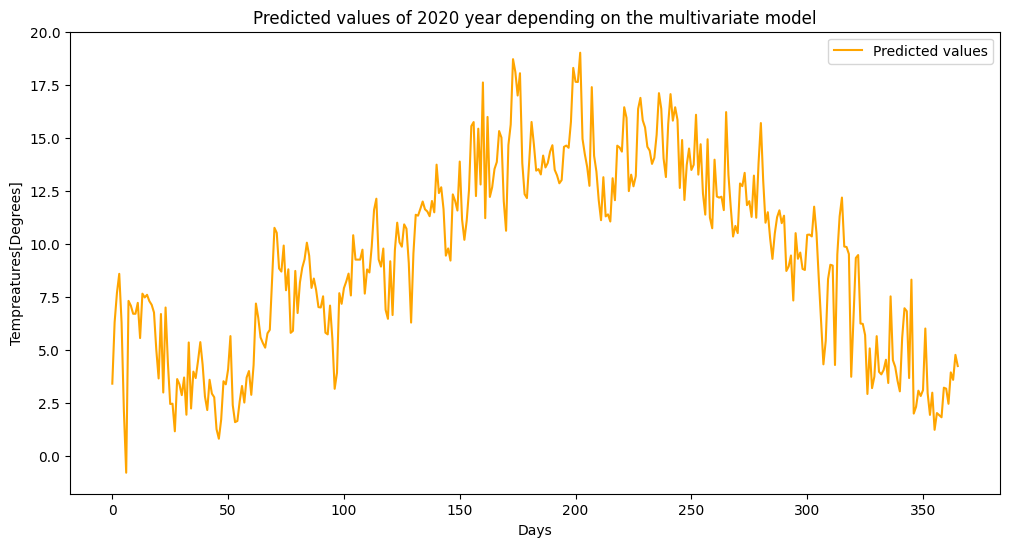

In [51]:
predicted_inverse = inverse(predictions_2020)

plt.figure(figsize = (12,6))
plt.plot(predicted_inverse, c ="orange", label = "Predicted values")
plt.title("Predicted values of 2020 year depending on the multivariate model")
plt.xlabel("Days")
plt.ylabel("Tempreatures[Degrees]")
plt.legend()
#plt.savefig("prediction 2020 tempreature using multivariate model.png")
plt.show()

In [46]:
#Make sure that the dataset has been updated with new values. 
predicted_set.tail()

,Av temp,Day sin,Year sin,Year cos
Date,,,,
2020-12-27,-1.227578,-1.295283e-11,-0.075062,0.997179
2020-12-28,-0.936661,-8.654291e-12,-0.057898,0.998323
2020-12-29,-1.006132,-4.355752e-12,-0.040716,0.999171
2020-12-30,-0.774514,-5.721331e-14,-0.023523,0.999723
2020-12-31,-0.878116,-1.031059e-11,-0.006322,0.999980


In [52]:
#Extracting the data 
df = pd.DataFrame(predicted_inverse, columns= ["2020 tempreature"])
df["Date"] = pd.date_range(start='2020-01-01', end='2020-12-31')
df.set_index("Date", inplace = True)
df.to_csv("Predicted values of 2020 year.csv",index=True)

**Ploting a comparison between scores.**

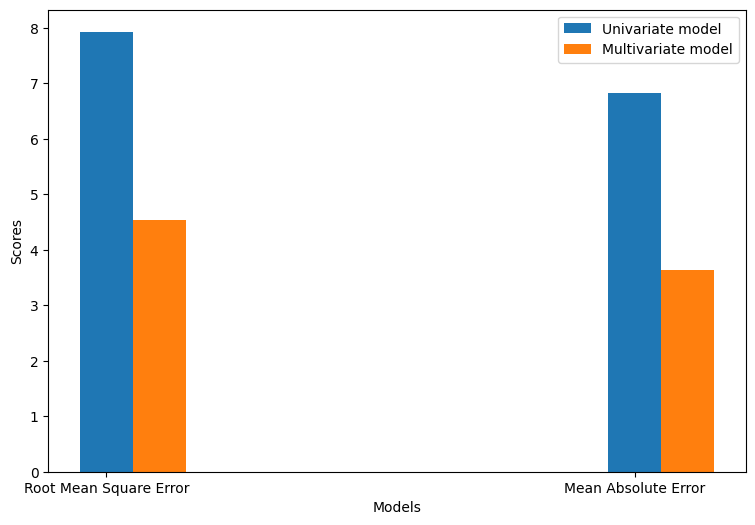

In [72]:
trainScorer_u = 7.93
trainScorem_u = 6.82
x = np.array([0,0.5])
y1 = [trainScorer_u,trainScorem_u]
y2 = [trainScorer_m,trainScorem_m]

width = 0.05
  
# plot data in grouped manner of bar type
plt.figure (figsize = (9,6))
plt.bar(x, y1, width)
plt.bar(x+0.05, y2, width)
plt.xticks(x, ['Root Mean Square Error', 'Mean Absolute Error'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Univariate model", "Multivariate model"])
#plt.savefig("The scores of the models")
plt.show()

-------------
## 5. What I am planning to do to If I have enough time and resources 

### 1. Finding the best hyperparameters: 
- I already did that but it takes ages and I didn't get results. 
- The main part of the code is to do the following: 

In [ ]:
'''
# I will focus on number of neurons only
def create_model (neurons,neurons1,neurons2 ): 
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True,activation='relu', input_shape=trainSet[0].shape[1:],kernel_constraint=MaxNorm(4)))
    model.add(LSTM(neurons1, return_sequences=True))
    model.add(LSTM(neurons2, return_sequences=True))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model 

#Define the range of the values: 
neurons = [12, 32, 64, 128]
neurons1 = [32, 64, 128]
neurons2 = [32, 64, 128]
param_grid = dict(model__neurons=neurons,model__neurons1=neurons1,model__neurons2=neurons2)
#To be sure about the reproducibility of the code
seed = 100
np.random.seed(seed)
#import time #I import it to estimate the time
#import subprocess #I import it to make the computer awake during the process of searching
#start = time.time()
#caffeinate_process = subprocess.Popen(['caffeinate'])
model = KerasRegressor(model=create_model,epochs=10, batch_size=1, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit( trainSet[0],  trainSet[1])
# summarize results
#end = time.time()
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(f"The time consumed is: {end-start} ")
'''

### 2. Finding another affecting factor: 

In [74]:
originalFile.corr()

/var/folders/5h/yplt5td549x2mqvcd96blk9m0000gn/T/ipykernel_27530/1114544098.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  originalFile.corr()


,Year,Month,Day,PPT.,Av temp,Tmax,Tmin
Year,1.000000e+00,6.960083e-16,-2.685202e-15,0.012784,0.079716,0.066658,0.090041
Month,6.960083e-16,1.000000e+00,1.055681e-02,0.043193,0.235813,0.201864,0.254093
Day,-2.685202e-15,1.055681e-02,1.000000e+00,-0.005544,0.004077,0.002784,0.005244
PPT.,1.278376e-02,4.319278e-02,-5.544188e-03,1.000000,-0.027155,-0.068583,0.026468
Av temp,7.971588e-02,2.358126e-01,4.076739e-03,-0.027155,1.000000,0.963923,0.945183
Tmax,6.665780e-02,2.018637e-01,2.783900e-03,-0.068583,0.963923,1.000000,0.824226
Tmin,9.004126e-02,2.540933e-01,5.244039e-03,0.026468,0.945183,0.824226,1.000000


**Comments**

- For instance, there is a correlation between Av temp and daily rainfall (PPT) so I will include it in the multivaraite model. 